In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import json
from sklearn.dummy import DummyRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from utils import FriedmanDataset, run_kfold_visualizer, ModelOptimizerFinal 

In [141]:
# current date as string (for saving json)
from datetime import date
today = date.today().strftime("%d-%m-%Y")
today

json_file = "./results-RF-anne.json" # set path to save json-file 




In [335]:
# Data Creation
n_train= 200
n_test= 100000
n_features = 10
FD_noise= 0
transformation='sqrt'
seed=567

# Stratification
n_groups = 20

# RandomSearchCV
n_folds = 5
n_iter= 20
n_repetitions= 10
scoring= 'neg_mean_squared_error' #Metriken anschauen
n_jobs= -1

RF_param_grid = {
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, n_features + 1) #@nadja is that right?
}

# Initalize Model
modelOptimizer = ModelOptimizerFinal(RandomForestRegressor(random_state=seed), 
                                RF_param_grid,
                                random_state=seed)

model = RandomForestRegressor(n_estimators=1000, random_state=seed) 
# Save Parameters in a dictionary
params = {'model': modelOptimizer.model.__class__.__name__,
          'n_train': n_train,
          'n_test': n_test,
          'n_features': n_features,
          'FD_noise': FD_noise,
          'transformation': transformation,
          'n_groups': n_groups,
          'n_folds': n_folds,
          'n_iter': n_iter,
          'n_repetitions': n_repetitions,
          'scoring': scoring, 
          'n_jobs': n_jobs,
          'json_file': json_file}
params

{'model': 'RandomForestRegressor',
 'n_train': 200,
 'n_test': 100000,
 'n_features': 10,
 'FD_noise': 0,
 'transformation': 'sqrt',
 'n_groups': 20,
 'n_folds': 5,
 'n_iter': 20,
 'n_repetitions': 10,
 'scoring': 'neg_mean_squared_error',
 'n_jobs': -1,
 'json_file': './test.json'}

In [143]:
train = FriedmanDataset(n_samples=n_train, 
                            n_features=n_features, 
                            noise=FD_noise, 
                            random_state=seed)
#train.transform(transformation=transformation)

test = FriedmanDataset(n_samples=n_test,
                           n_features=n_features,
                           noise=FD_noise,
                           random_state=seed)

In [339]:
# get parameters from params dictionary
n_train = params['n_train']
n_test = params['n_test']
n_features = params['n_features']
noise = params['FD_noise']
transformation = params['transformation']
n_folds= params['n_folds']
n_groups = params['n_groups']
scoring = params['scoring']
n_jobs = params['n_jobs']
n_iter = params['n_iter']
n_repetitions = params['n_repetitions']
json_file = params['json_file']

In [340]:
X_test, y_test = generate_friedman1(n_samples=n_test,
                                                     n_features=n_features,
                                                     noise=5,
                                                     random_state=1718,
                                                     transformation='sqrt')

In [341]:
import random

In [342]:
random_states = None

In [343]:
if not isinstance(random_states, list):
    random.seed(seed)
    random_states = random.sample(range(1, 10000), n_repetitions)

In [344]:
random_states

[2331, 5223, 7789, 1361, 9493, 4638, 7623, 6460, 479, 2661]

In [345]:
all_results = {}
all_results_stratified = {}

In [346]:
initialization = {
            'model_info': params,
            'seed': seed
        }
initialization

{'model_info': {'model': 'RandomForestRegressor',
  'n_train': 200,
  'n_test': 100000,
  'n_features': 10,
  'FD_noise': 0,
  'transformation': 'sqrt',
  'n_groups': 20,
  'n_folds': 5,
  'n_iter': 20,
  'n_repetitions': 10,
  'scoring': 'neg_mean_squared_error',
  'n_jobs': -1,
  'json_file': './test.json'},
 'seed': 567}

In [347]:
for repetition in range(n_repetitions):
    print(repetition)

repetition=0

0
1
2
3
4
5
6
7
8
9


In [348]:
X_train, y_train = generate_friedman1(n_samples=n_train,
                                                        n_features=n_features,
                                                        noise=5,
                                                        random_state=random_states[repetition],
                                                        transformation='sqrt')

In [349]:
y_train

array([4.24480491, 3.75802221, 5.05028961, 4.33340671, 3.88975302,
       4.97864666, 4.51332033, 4.53210509, 3.37281676, 1.40220202,
       4.78256716, 3.94048031, 4.8109586 , 3.75746215, 3.48710167,
       2.88312239, 3.64504473, 4.1192131 , 4.05030068, 3.99963594,
       4.52933586,        nan, 3.41296582, 1.53978225, 3.64376994,
       3.26448527, 3.78215468, 3.91556482, 4.48865919,        nan,
       4.30224533, 5.25379081, 2.46112927, 4.62044858, 4.67913174,
       3.11906829, 3.15229023, 3.66581649, 4.04009027, 4.489475  ,
       4.61656701, 3.42522022, 3.82776742, 0.85874264, 3.72010053,
       3.82286338, 2.35519664, 3.82535325, 3.49936724, 2.02979521,
       4.52880907, 6.27966252, 2.63874066, 2.95221701, 4.48371754,
       4.14363162, 3.60366544, 2.75491293, 4.68869887, 3.59156614,
       4.36178895, 3.54202909, 3.64165355, 5.45734961,        nan,
       2.82520916, 4.53953874, 4.41600386, 4.03357916, 2.80228078,
       4.38403903, 4.21879338, 4.39115016, 3.58982041, 4.86677

In [350]:
np.isnan(y_train).any()

True

In [351]:
# Check for NaN values in the data
            
X_train, y_train = make_friedman1(n_samples=n_train,
                                    n_features=n_features, 
                                    noise=noise, 
                                    random_state=random_states[repetition])
X_test, y_test = make_friedman1(n_samples=n_test,
                                    n_features=n_features,
                                    noise=noise,
                                    random_state=1718)
min_val = min(y_train.min(), y_test.min())
                # @Anne: Noch absprechen... +1 weil es sonst Skala durch Werte [0, 1] hauptsächlich bei y_test größer wird.           
y_train = y_train + abs(min_val) + 1
y_test = y_test + abs(min_val) + 1
if transformation=='identity':
    pass
elif transformation == 'log':
    y_train = np.log(y_train)
    y_test = np.log(y_test)
elif transformation == 'sqrt':
    y_train = np.sqrt(y_train)
    y_test = np.sqrt(y_test)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

1.8605467590571614


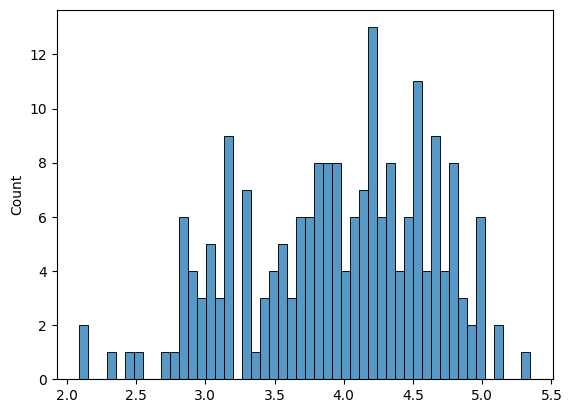

In [160]:
sns.histplot(y_train, bins=50)
print(min(np.sqrt(y_train+ abs(min(y_train.min(), y_test.min())-0.01))))

1.6585058144207727


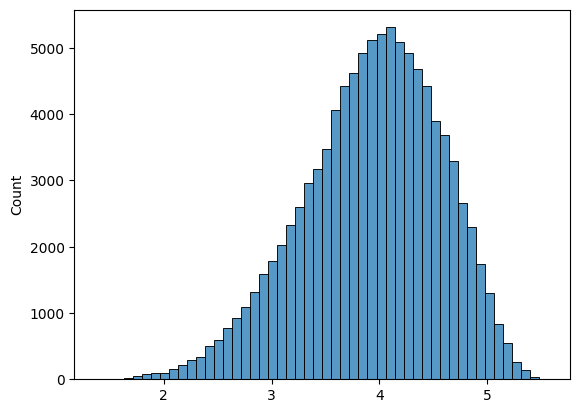

In [161]:
sns.histplot(y_test, bins=50)
print(min(np.sqrt(y_test+ abs(min(y_train.min(), y_test.min())-0.01))))

In [354]:
stratified=False                                                      
                                                            

In [362]:
model

RandomForestRegressor(n_estimators=1000, random_state=567)

In [365]:
def perform_optimization(X_train, 
                              y_train, 
                              X_test, 
                              y_test, 
                              cv, 
                              n_groups, 
                              scoring, 
                              n_jobs, 
                              n_iter, 
                              random_state,
                              stratified):
        '''
        Function to perform the optimization.
        Inputs:
            the same as in optimize function
            stratified: whether to use stratified k-fold or not
        Outputs:
            evaluation_results: the evaluation results in a dictionary
            best_params: the best parameters in a dictionary
        '''
        if stratified:
            cv_splits = create_cont_folds(y_train, n_folds=cv, n_groups=n_groups)
            output_text = 'Stratified Split Cross-validation'
        else:
            cv_splits = cv
            output_text = 'Random Split Cross-validation'
        
        start_time = time.time()
        random_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=RF_param_grid,
                                           n_iter=n_iter,
                                           cv=cv_splits,
                                           scoring=scoring,
                                           n_jobs=n_jobs,
                                           random_state=random_state)
        random_search.fit(X_train, y_train)
        end_time = time.time()
        running_time = end_time - start_time
        print("Best Parameters:", random_search.best_params_)

        # Evaluate the model
        evaluation_results = evaluate_rf(random_search, X_train, X_test, y_train, y_test)
        print("Evaluation Results of", output_text, ': ', evaluation_results)
        print('running_time: ', round(running_time/60, 2), ' min')
        
        return evaluation_results, random_search.best_params_, running_time


In [366]:
# Perform optimization with unstratified cross-validation
unstratified_results, unstratified_params, unstratified_running_time = perform_optimization(
                                                            X_train, 
                                                            y_train, 
                                                            X_test,
                                                            y_test,
                                                            n_folds, 
                                                            n_groups,
                                                            scoring, 
                                                            n_jobs, 
                                                            n_iter, 
                                                            random_states[repetition],
                                                            stratified=False)

Best Parameters: {'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 9}
Evaluation Results of Random Split Cross-validation :  {'train r2': 0.9019, 'test r2': 0.7694, 'train mse': 0.044, 'test mse': 0.0938, 'train mae': 0.1517, 'test mae': 0.2412}
running_time:  1.07  min


In [367]:
all_results.update({f'Repetition {repetition}': unstratified_results})

In [372]:
model=RandomForestRegressor(n_estimators=1000, random_state=seed)
model

RandomForestRegressor(n_estimators=1000, random_state=567)

In [373]:
# Perform optimization with stratified cross-validatio
stratified_results, stratified_params, stratified_running_time = perform_optimization(X_train, 
                                                            y_train, 
                                                            X_test,
                                                            y_test,
                                                            n_folds, 
                                                            n_groups, 
                                                            scoring, 
                                                            n_jobs, 
                                                            n_iter, 
                                                            random_states[repetition],
                                                            stratified=True)

Best Parameters: {'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 9}
Evaluation Results of Stratified Split Cross-validation :  {'train r2': 0.9019, 'test r2': 0.7694, 'train mse': 0.044, 'test mse': 0.0938, 'train mae': 0.1517, 'test mae': 0.2412}
running_time:  1.01  min


In [374]:
all_results_stratified.update({f'Repetition {repetition}': stratified_results}) # @Anne: check ich nicht ganz, was das macht

In [375]:
if unstratified_params == stratified_params:
                hyperparameters_same = True
else:
                hyperparameters_same = False

hyperparameters_same

True

In [376]:
results = {
                'repetition': repetition,
                'random_state': random_states[repetition],
                'hyperparameters_same': hyperparameters_same,
                'unstratified_params':unstratified_params,
                'stratified_params': stratified_params,
                'unstratified_results': unstratified_results,
                'stratified_results': stratified_results,
                'unstratified_running_time': round(unstratified_running_time,2), 
                'stratified_running_time': round(stratified_running_time, 2)
            }

In [377]:
initialization.update(results)

In [378]:
with open(json_file, 'r') as file:
                existing_data = json.load(file)

            # Append the new results dictionary to the existing data
existing_data.append(initialization)

In [379]:
with open(json_file, 'w') as file:
                json.dump(existing_data, file, indent=4, default=_convert_numpy_types)

In [177]:
if stratified:
            cv_splits = create_cont_folds(y_train, n_folds=cv, n_groups=n_groups)
            output_text = 'Stratified Split Cross-validation'
else:
            cv_splits = cv
            output_text = 'Random Split Cross-validation'

In [178]:
output_text

'Random Split Cross-validation'

In [180]:
random_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=RF_param_grid,
                                           n_iter=n_iter,
                                           cv=cv_splits,
                                           scoring=scoring,
                                           n_jobs=n_jobs,
                                           random_state=random_states[repetition])

In [181]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=567),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
                   random_state=2331, scoring='neg_mean_squared_error')

In [182]:
random_search.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 8}

In [184]:
best_model=random_search.best_estimator_

In [185]:
best_model

RandomForestRegressor(max_features=8, n_estimators=1000, random_state=567)

In [186]:
train_r2, test_r2 = round(best_model.score(X_train, y_train), 4), round(best_model.score(X_test, y_test), 4)
y_train_pred, y_test_pred = best_model.predict(X_train), best_model.predict(X_test)
train_mse, test_mse = round(mean_squared_error(y_train, y_train_pred), 4), round(mean_squared_error(y_test, y_test_pred), 4)
train_mae, test_mae = round(mean_absolute_error(y_train, y_train_pred), 4), round(mean_absolute_error(y_test, y_test_pred), 4)

{'train r2': train_r2, 
                'test r2': test_r2, 
                'train mse': train_mse,
                'test mse': test_mse,
                'train mae': train_mae,
                'test mae': test_mae}


{'train r2': 0.9722,
 'test r2': 0.8023,
 'train mse': 0.0124,
 'test mse': 0.0804,
 'train mae': 0.0843,
 'test mae': 0.2241}

In [187]:
evaluation_results = {'train r2': train_r2, 
                'test r2': test_r2, 
                'train mse': train_mse,
                'test mse': test_mse,
                'train mae': train_mae,
                'test mae': test_mae}

In [188]:
random_search.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 8}

In [189]:
running_time=456

In [190]:
unstratified_results = evaluation_results
unstratified_params = random_search.best_params_
unstratified_running_time = running_time

In [191]:
all_results.update({f'Repetition {repetition}': unstratified_results})
all_results

{'Repetition 0': {'train r2': 0.9722,
  'test r2': 0.8023,
  'train mse': 0.0124,
  'test mse': 0.0804,
  'train mae': 0.0843,
  'test mae': 0.2241}}

In [192]:
stratified=True

In [204]:
random_states[repetition]

2331

In [296]:
if stratified:
            cv_splits = create_cont_folds(y_train, n_folds=cv, n_groups=n_groups, seed=random_states[repetition])
            output_text = 'Stratified Split Cross-validation'
else:
            cv_splits = cv
            output_text = 'Random Split Cross-validation'

StratifiedKFold(n_splits=5, random_state=2331, shuffle=True)
[ 8  7 17 19 13 15 15 11  8  1 15 13 14  6  5  3  4  9 16 14 17  0  1 10
 12  9  8 11  6  1  7 18  2 10 11  0  5 15 12 13 11 13 14  5  5  4  3  7
  1  1  9 19  3 11 14 16  8  0 15  5 14  7  6 17  0  3 14 12  9  4 16  7
 12  1 16  6 17 19 19  2  9  9 13  8  2  7 18 15  7  7 12  9  6  7 16  5
 18 10 19  1  8  0 10  9  0 18 12  4 15 13 13  5  4  2 19  2 12  7 10  4
 14 17  9 18 15 11  3 10 15 13  0  2 13  2  4  8  3  2  0 11  8  0  6 17
  5  8 10 19  0 17 16 18  6 18 16 10  5  6 15 10 18 13  1  2  3 11 10  3
 12  4 11  8 17  1 14 19  2  4 12 11 14  6 16  6 17 18  3  9 19  4 16  5
  1 16  3 12 18 14 19 17]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [194]:
output_text

'Stratified Split Cross-validation'

In [201]:
cv_splits[1][1]

array([  0,   3,   5,  14,  20,  22,  25,  31,  38,  42,  47,  53,  59,
        65,  66,  70,  77,  80,  84,  86,  88,  94, 100, 102, 107, 109,
       110, 130, 136, 138, 139, 142, 158, 166, 168, 169, 173, 176, 181,
       199], dtype=int64)

In [285]:
# create StratifiedKFold like for classification
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed
                      )
print(skf)
        

StratifiedKFold(n_splits=5, random_state=567, shuffle=True)


In [286]:
# create groups in y with pd.qcut: quantile-based discretization 
y_grouped = pd.qcut(y_train, 10, labels=False)
print(y_grouped)
       

[4 4 9 9 7 8 8 6 4 0 8 6 7 3 3 1 2 5 9 8 9 0 0 5 6 4 4 5 3 0 3 9 1 5 6 0 2
 8 6 7 5 7 7 2 2 2 1 3 1 1]


In [287]:
y_train

array([13.49675833, 13.14662867, 21.61486693, 23.37988677, 17.54568753,
       19.37826373, 19.36857575, 15.99028952, 13.63930032,  6.73033621,
       19.20636992, 16.77710628, 17.88559872, 12.64553682, 11.72190893,
        8.51202173, 10.59627781, 14.32909554, 19.44540567, 18.64268771,
       20.82860817,  6.6104277 ,  6.77997502, 15.40074227, 16.66265005,
       14.1264292 , 13.49696747, 15.90746383, 12.43659789,  6.86946805,
       12.71569569, 21.68660283,  8.10388496, 14.99274179, 16.1099137 ,
        6.59792983, 11.49824735, 19.1618746 , 16.37216073, 17.62434253,
       15.92798373, 17.27362973, 18.00311042, 11.03056273, 11.20698455,
       10.28774508,  8.52559489, 12.9475875 ,  7.12901488,  7.55750945])

In [288]:
 # create fold numbers    
fold_nums = np.zeros(len(y_train))
print(fold_nums)
        

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [266]:
skf.split(y_grouped, y_grouped)

<generator object _BaseKFold.split at 0x0000022EBF3B5BE0>

In [289]:
#split(X, y[, groups]): Generate indices to split data into training and test set
for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
    fold_nums[v] = fold_no
    print('fold_no:', fold_no)
    print('t and length t:', len(t), t)
    print('v and length v:', len(v), v)
    #print(v)



fold_no: 0
t and length t: 40 [ 0  2  3  4  5  6  8  9 10 11 12 13 15 16 17 18 22 23 24 25 26 28 29 30
 31 32 33 34 35 36 37 38 40 41 42 43 45 46 47 49]
v and length v: 10 [ 1  7 14 19 20 21 27 39 44 48]
fold_no: 1
t and length t: 40 [ 1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 32 34 36 39 40 41 44 45 46 47 48 49]
v and length v: 10 [ 0 13 15 31 33 35 37 38 42 43]
fold_no: 2
t and length t: 40 [ 0  1  2  4  6  7  9 10 11 12 13 14 15 16 18 19 20 21 23 25 26 27 28 29
 30 31 33 34 35 37 38 39 40 42 43 44 45 46 48 49]
v and length v: 10 [ 3  5  8 17 22 24 32 36 41 47]
fold_no: 3
t and length t: 40 [ 0  1  2  3  4  5  7  8 10 13 14 15 17 19 20 21 22 24 26 27 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
v and length v: 10 [ 6  9 11 12 16 18 23 25 28 49]
fold_no: 4
t and length t: 40 [ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27
 28 31 32 33 35 36 37 38 39 41 42 43 44 47 48 49]
v and length v: 10 [ 2  4 10 26

In [290]:
fold_nums

array([1., 0., 4., 2., 4., 2., 3., 0., 2., 3., 4., 3., 3., 1., 0., 1., 3.,
       2., 3., 0., 0., 0., 2., 3., 2., 3., 4., 0., 3., 4., 4., 1., 2., 1.,
       4., 1., 2., 1., 1., 0., 4., 2., 1., 1., 0., 4., 4., 2., 0., 3.])

In [282]:
y_train

array([13.49675833, 13.14662867, 21.61486693, 23.37988677, 17.54568753,
       19.37826373, 19.36857575, 15.99028952, 13.63930032,  6.73033621,
       19.20636992, 16.77710628, 17.88559872, 12.64553682, 11.72190893,
        8.51202173, 10.59627781, 14.32909554, 19.44540567, 18.64268771,
       20.82860817,  6.6104277 ,  6.77997502, 15.40074227, 16.66265005,
       14.1264292 , 13.49696747, 15.90746383, 12.43659789,  6.86946805,
       12.71569569, 21.68660283,  8.10388496, 14.99274179, 16.1099137 ,
        6.59792983, 11.49824735, 19.1618746 , 16.37216073, 17.62434253,
       15.92798373, 17.27362973, 18.00311042, 11.03056273, 11.20698455,
       10.28774508,  8.52559489, 12.9475875 ,  7.12901488,  7.55750945])

In [295]:
X_train, y_train = make_friedman1(n_samples=n_train,
                                  n_features=n_features,
                                    noise=noise,    
                                    random_state=random_states[repetition])

In [294]:
cv_splits = []

        # iterate over folds and creat train and test indices for each fold
for i in range(n_folds):
            print('Round:', i)
            test_indices = np.argwhere(fold_nums==i).flatten()
            print('Test indices:', np.sort(test_indices))
            print('y value:', np.sort(y_train[test_indices]))
            print('y group:', np.sort(y_grouped[test_indices]))
            train_indices = list(set(range(len(y_grouped))) - set(test_indices))
            print('Train group:', np.sort(y_grouped[train_indices]))
            cv_splits.append((train_indices, test_indices))

        

Round: 0
Test indices: [ 1  7 14 19 20 21 27 39 44 48]
y value: [ 6.6104277   7.12901488 11.20698455 11.72190893 13.14662867 15.90746383
 15.99028952 17.62434253 18.64268771 20.82860817]
y group: [0 1 2 3 4 5 6 7 8 9]
Train group: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 9
 9 9 9]
Round: 1
Test indices: [ 0 13 15 31 33 35 37 38 42 43]
y value: [ 6.59792983  8.51202173 11.03056273 12.64553682 13.49675833 14.99274179
 16.37216073 18.00311042 19.1618746  21.68660283]
y group: [0 1 2 3 4 5 6 7 8 9]
Train group: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 9
 9 9 9]
Round: 2
Test indices: [ 3  5  8 17 22 24 32 36 41 47]
y value: [ 6.77997502  8.10388496 11.49824735 12.9475875  13.63930032 14.32909554
 16.66265005 17.27362973 19.37826373 23.37988677]
y group: [0 1 2 3 4 5 6 7 8 9]
Train group: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 9
 9 9 9]
Round: 3
Test indices: [ 6  9 11 12 16 18 23 25 28 49]
y v

In [258]:
np.sort(y_train[test_indices])

array([ 4.82497505,  6.08889195,  6.59792983,  6.68591062,  7.66597144,
        7.72432815,  8.39301407,  8.51202173, 10.5509058 , 10.75454524,
       11.20698455, 11.34732579, 12.08296937, 12.11582259, 12.893331  ,
       13.2717783 , 13.63930032, 14.0208369 , 14.24681185, 14.71496762,
       14.98657953, 15.62506901, 15.99564608, 16.09446808, 16.63470347,
       16.77710628, 17.27362973, 17.43843385, 18.57870544, 19.18241889,
       19.29274193, 19.36857575, 19.74837384, 20.03128596, 20.79933633,
       20.82860817, 21.66970158, 21.68660283, 23.19898683, 24.74116702])

In [312]:
seed

567

In [297]:
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=1000, random_state=seed),
                                           param_distributions=RF_param_grid,
                                           n_iter=n_iter,
                                           cv=cv_splits,
                                           scoring=scoring,
                                           n_jobs=n_jobs,
                                           random_state=random_states[repetition])

In [299]:
output_text

'Stratified Split Cross-validation'

In [300]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=[([2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
                         21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35,
                         36, ...],
                        array([  0,   1,   5,   7,  14,  20,  30,  38,  39,  40,  44,  45,  64,
        72,  73,  91,  94,  99, 101, 103, 107, 109, 128, 137, 145, 146,
       147, 151, 152, 155, 163, 164, 167, 180, 181, 182, 196, 197, 198,
       199], dtype=int64)),
                       ([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 20,
                         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32...
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=567),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
                   random_state=2331, scoring='neg_mean_squared_error')

In [311]:
best_model=random_search.best_estimator_
train_r2, test_r2 = round(best_model.score(X_train, y_train), 4), round(best_model.score(X_test, y_test), 4)
y_train_pred, y_test_pred = best_model.predict(X_train), best_model.predict(X_test)
train_mse, test_mse = round(mean_squared_error(y_train, y_train_pred), 4), round(mean_squared_error(y_test, y_test_pred), 4)
train_mae, test_mae = round(mean_absolute_error(y_train, y_train_pred), 4), round(mean_absolute_error(y_test, y_test_pred), 4)
stratified_results = {'train r2': train_r2, 
                'test r2': test_r2, 
                'train mse': train_mse,
                'test mse': test_mse,
                'train mae': train_mae,
                'test mae': test_mae}

In [306]:
stratified_results

{'train r2': 0.973,
 'test r2': -295.5191,
 'train mse': 0.7124,
 'test mse': 120.607,
 'train mae': 0.6516,
 'test mae': 10.4731}

In [310]:
random_search.best_score_

-5.234035981477888

In [302]:
stratified_params = random_search.best_params_
stratified_running_time = 457

In [303]:
all_results_stratified.update({f'Repetition {repetition}': stratified_results}) 
all_results_stratified

{'Repetition 0': {'train r2': 0.973,
  'test r2': -295.5191,
  'train mse': 0.7124,
  'test mse': 120.607,
  'train mae': 0.6516,
  'test mae': 10.4731}}

In [305]:
all_results

{'Repetition 0': {'train r2': 0.9722,
  'test r2': 0.8023,
  'train mse': 0.0124,
  'test mse': 0.0804,
  'train mae': 0.0843,
  'test mae': 0.2241}}

In [304]:
if unstratified_params == stratified_params:
                hyperparameters_same = True
else:
                hyperparameters_same = False

hyperparameters_same

True

In [323]:
results = {
                'repetition': repetition,
                'random_state': random_states[repetition],
                'hyperparameters_same': hyperparameters_same,
                'unstratified_params':unstratified_params,
                'stratified_params': stratified_params,
                'unstratified_results': unstratified_results,
                'stratified_results': stratified_results,
                'unstratified_running_time': round(unstratified_running_time,2), 
                'stratified_running_time': round(stratified_running_time, 2)
            }

In [308]:
initialization.update(results)
initialization

{'model_info': {'model': 'RandomForestRegressor',
  'n_train': 200,
  'n_test': 100000,
  'n_features': 10,
  'FD_noise': 0,
  'transformation': 'sqrt',
  'n_groups': 20,
  'n_folds': 5,
  'n_iter': 200,
  'n_repetitions': 10,
  'scoring': 'neg_mean_squared_error',
  'n_jobs': -1,
  'json_file': './results-RF-anne.json'},
 'seed': 567,
 'repetition': 0,
 'random_state': 2331,
 'hyperparameters_same': True,
 'unstratified_params': {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 8},
 'stratified_params': {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 8},
 'unstratified_results': {'train r2': 0.9722,
  'test r2': 0.8023,
  'train mse': 0.0124,
  'test mse': 0.0804,
  'train mae': 0.0843,
  'test mae': 0.2241},
 'stratified_results': {'train r2': 0.973,
  'test r2': -295.5191,
  'train mse': 0.7124,
  'test mse': 120.607,
  'train mae': 0.6516,
  'test mae': 10.4731},
 'unstratified_running_time': 456,
 'stratified_running_time': 457}

In [313]:
repetition=1

In [324]:
results

{'repetition': 1,
 'random_state': 5223,
 'hyperparameters_same': True,
 'unstratified_params': {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 8},
 'stratified_params': {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 8},
 'unstratified_results': {'train r2': 0.9722,
  'test r2': 0.8023,
  'train mse': 0.0124,
  'test mse': 0.0804,
  'train mae': 0.0843,
  'test mae': 0.2241},
 'stratified_results': {'train r2': 0.973,
  'test r2': -295.5191,
  'train mse': 0.7124,
  'test mse': 120.607,
  'train mae': 0.6516,
  'test mae': 10.4731},
 'unstratified_running_time': 456,
 'stratified_running_time': 457}

In [326]:
json_file='./test.json'

In [332]:
with open(json_file, 'r') as file:
    existing_data = json.load(file)
existing_data

[{'model_info': {'model': 'RandomForestRegressor',
   'n_train': 200,
   'n_test': 100000,
   'n_features': 10,
   'FD_noise': 0,
   'transformation': 'sqrt',
   'n_groups': 20,
   'n_folds': 5,
   'n_iter': 200,
   'n_repetitions': 10,
   'scoring': 'neg_mean_squared_error',
   'n_jobs': -1,
   'json_file': './results-RF-anne.json'},
  'seed': 567,
  'repetition': 0,
  'random_state': 2331,
  'hyperparameters_same': True,
  'unstratified_params': {'min_samples_split': 2,
   'min_samples_leaf': 1,
   'max_features': 8},
  'stratified_params': {'min_samples_split': 2,
   'min_samples_leaf': 1,
   'max_features': 8},
  'unstratified_results': {'train r2': 0.9722,
   'test r2': 0.8023,
   'train mse': 0.0124,
   'test mse': 0.0804,
   'train mae': 0.0843,
   'test mae': 0.2241},
  'stratified_results': {'train r2': 0.973,
   'test r2': -295.5191,
   'train mse': 0.7124,
   'test mse': 120.607,
   'train mae': 0.6516,
   'test mae': 10.4731},
  'unstratified_running_time': 456,
  'stratifi

In [333]:
existing_data.append(initialization)

In [334]:
with open(json_file, 'w') as file:
                json.dump(existing_data, file, indent=4, default=_convert_numpy_types)


In [331]:
initialization.update(results)
display(JSON(initialization))

<IPython.core.display.JSON object>

In [321]:
from IPython.display import display, JSON

In [322]:
display(JSON(initialization))

<IPython.core.display.JSON object>

In [209]:
def create_cont_folds(y, 
                          n_folds, 
                          n_groups, 
                          seed):
        '''
        Function to create continuous folds.
        Inputs:
            y: the target variable
            n_folds: the number of folds
            n_groups: the number of groups (based on quantiles)
            seed: the seed to be used
        Outputs:
            cv_splits: the indices for the folds
        '''
        # create StratifiedKFold like for classification
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        print(skf)
        # create groups in y with pd.qcut: quantile-based discretization 
        y_grouped = pd.qcut(y, n_groups, labels=False)
        print(y_grouped)
        # create fold numbers    
        fold_nums = np.zeros(len(y))
        print(fold_nums)
        #split(X, y[, groups]): Generate indices to split data into training and test set
        for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
            fold_nums[v] = fold_no
            print(fold_no)
            print(v)

        cv_splits = []

        # iterate over folds and creat train and test indices for each fold
        for i in range(n_folds):
            test_indices = np.argwhere(fold_nums==i).flatten()
            train_indices = list(set(range(len(y_grouped))) - set(test_indices))
            cv_splits.append((train_indices, test_indices))

        return cv_splits

In [30]:
def generate_friedman1(n_samples, n_features, noise, random_state, transformation='identity'):
        '''
        Function to generate dataset according to Friedman1.
        Inputs:
            n_samples: number of data points
            n_features: number of features (have to be at least 5)
            noise: The standard deviation of the gaussian noise applied to the output.
            random_state: to repreoduce dataset
        Outputs:
            features: array
            y: array

        '''
        features, y = make_friedman1(n_samples=n_samples, 
                                    n_features=n_features, 
                                    noise=noise, 
                                    random_state=random_state)
        if transformation=='identity':
            pass
        elif transformation == 'log':
            y = np.log(y)
             
        elif transformation == 'sqrt':
            y = np.sqrt(y)
             
        else:
            raise ValueError('Transformation not implemented.')

        return features, y

In [337]:
import time

In [338]:

def create_cont_folds(y, 
                          n_folds=5, 
                          n_groups=5, 
                          seed=1):
        '''
        Function to create continuous folds.
        Inputs:
            y: the target variable
            n_folds: the number of folds
            n_groups: the number of groups (based on quantiles)
            seed: the seed to be used
        Outputs:
            cv_splits: the indices for the folds
        '''
        # create StratifiedKFold like for classification
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

        # create groups in y with pd.qcut: quantile-based discretization 
        y_grouped = pd.qcut(y, n_groups, labels=False)

        # create fold numbers    
        fold_nums = np.zeros(len(y))
        #split(X, y[, groups]): Generate indices to split data into training and test set
        for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
            fold_nums[v] = fold_no

        cv_splits = []

        # iterate over folds and creat train and test indices for each fold
        for i in range(n_folds):
            test_indices = np.argwhere(fold_nums==i).flatten()
            train_indices = list(set(range(len(y_grouped))) - set(test_indices))
            cv_splits.append((train_indices, test_indices))

        return cv_splits

def evaluate_rf(model, X_train, X_test, y_train, y_test):
        '''
        Function to evaluate the model.
        Inputs:
            model: the model to be evaluated
            X_train, X_test, y_train, y_test: the train and test data
        Outputs:
            dictionary with the evaluation results (R2, MSE, MAE)
        '''
        model=model.best_estimator_
        # @Anne: This somehow also does not work, do not know why.
        #best_score = model.best_score_

        train_r2, test_r2 = round(model.score(X_train, y_train), 4), round(model.score(X_test, y_test), 4)
        y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
        train_mse, test_mse = round(mean_squared_error(y_train, y_train_pred), 4), round(mean_squared_error(y_test, y_test_pred), 4)
        train_mae, test_mae = round(mean_absolute_error(y_train, y_train_pred), 4), round(mean_absolute_error(y_test, y_test_pred), 4)
        return {'train r2': train_r2, 
                'test r2': test_r2, 
                'train mse': train_mse,
                'test mse': test_mse,
                'train mae': train_mae,
                'test mae': test_mae}
        
     
def _convert_numpy_types(obj):
        '''
        Function to convert numpy types.
        Inputs:
            obj: the object to be converted
        Outputs:
            the converted object
        '''
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, np.int32):
            return int(obj)
        elif isinstance(obj, np.int64):
            return int(obj)
        elif isinstance(obj, (list, tuple)):
            return [_convert_numpy_types(item) for item in obj]
        elif isinstance(obj, dict):
            return {key: _convert_numpy_types(value) for key, value in obj.items()}
        else:
            return obj